In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Set display options
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

---
## Part 1: Load and Explore the Data

**Task 1.1**: Load the Twitter stock data from `TWTR.csv` and display the first and last 10 rows.

In [2]:
# Solution 1.1: Load Twitter stock data
twtr = pd.read_csv('TWTR.csv', index_col='Date', parse_dates=True)

print("Twitter Stock Data - First 10 rows:")
print(twtr.head(10))
print("\nTwitter Stock Data - Last 10 rows:")
print(twtr.tail(10))
print(f"\nTotal trading days: {len(twtr)}")
print(f"Date range: {twtr.index[0].strftime('%Y-%m-%d')} to {twtr.index[-1].strftime('%Y-%m-%d')}")

Twitter Stock Data - First 10 rows:
            Close  Open  High   Low    Volume
Date                                         
2022-01-03  41.75 41.54 41.78 41.52   7008677
2022-01-04  38.04 38.22 38.42 37.90  11941722
2022-01-05  39.01 38.96 39.07 38.89  19062296
2022-01-06  40.24 40.47 40.72 39.78  18793153
2022-01-07  39.65 39.46 39.82 39.22  27159972
2022-01-10  37.08 36.40 37.21 36.22  19792904
2022-01-11  39.10 38.86 39.14 38.72  24557028
2022-01-12  37.93 37.87 38.08 37.52  21261117
2022-01-13  39.05 38.91 39.13 38.77  24302165
2022-01-14  40.85 41.23 41.52 40.83  22584979

Twitter Stock Data - Last 10 rows:
            Close  Open  High   Low    Volume
Date                                         
2022-10-17  51.93 51.78 52.29 51.42  20082327
2022-10-18  50.96 50.92 51.32 50.80  14718858
2022-10-19  52.06 52.32 52.54 51.72  10025826
2022-10-20  51.02 51.41 51.76 51.02  12823384
2022-10-21  51.15 51.31 51.33 51.04   9902892
2022-10-24  53.35 53.75 53.95 53.25  18096291
2022-10-

**Task 1.2**: Calculate basic statistics for the Twitter stock price throughout 2022.

In [3]:
# Solution 1.2: Calculate basic statistics
print("Twitter Stock Price Statistics (2022):")
print("="*50)
print(f"Mean Close Price: ${twtr['Close'].mean():.2f}")
print(f"Median Close Price: ${twtr['Close'].median():.2f}")
print(f"Min Close Price: ${twtr['Close'].min():.2f}")
print(f"Max Close Price: ${twtr['Close'].max():.2f}")
print(f"Standard Deviation: ${twtr['Close'].std():.2f}")
print(f"\nPrice at start of year (Jan 3): ${twtr['Close'].iloc[0]:.2f}")
print(f"Price at end of period (Oct 28): ${twtr['Close'].iloc[-1]:.2f}")
print(f"Total return (if held entire period): {((twtr['Close'].iloc[-1] / twtr['Close'].iloc[0]) - 1) * 100:.2f}%")

Twitter Stock Price Statistics (2022):
Mean Close Price: $41.22
Median Close Price: $39.92
Min Close Price: $34.69
Max Close Price: $54.25
Standard Deviation: $4.56

Price at start of year (Jan 3): $41.75
Price at end of period (Oct 28): $53.70
Total return (if held entire period): 28.64%


**Task 1.3**: Plot the Twitter stock price for the entire period. Mark key dates with vertical lines:
- Announcement (April 14, 2022)
- Deal Accepted (April 25, 2022)
- Deal on Hold (May 13, 2022)
- Deal Revived (October 4, 2022)
- Deal Closed (October 28, 2022)

Also plot a horizontal line at the offer price ($54.20).

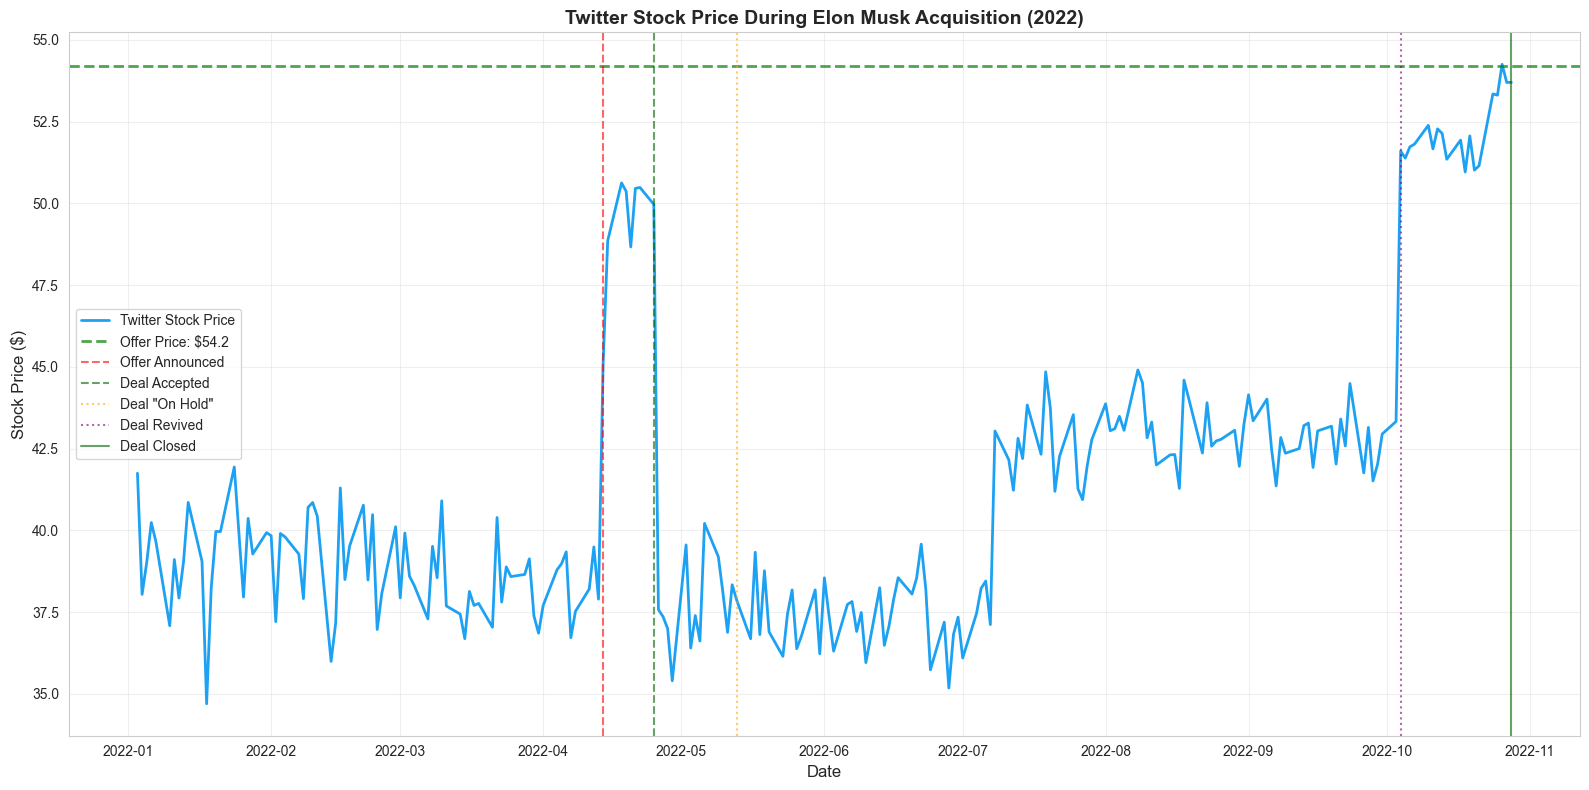

In [4]:
# Solution 1.3: Plot Twitter stock price with key events
fig, ax = plt.subplots(figsize=(16, 8))

# Plot stock price
ax.plot(twtr.index, twtr['Close'], linewidth=2, label='Twitter Stock Price', color='#1DA1F2')

# Plot offer price line
offer_price = 54.20
ax.axhline(y=offer_price, color='green', linestyle='--', linewidth=2, label=f'Offer Price: ${offer_price}', alpha=0.7)

# Mark key dates
key_dates = {
    '2022-04-14': ('Offer Announced', 'red', '--'),
    '2022-04-25': ('Deal Accepted', 'darkgreen', '--'),
    '2022-05-13': ('Deal "On Hold"', 'orange', ':'),
    '2022-10-04': ('Deal Revived', 'purple', ':'),
    '2022-10-28': ('Deal Closed', 'darkgreen', '-')
}

for date_str, (label, color, style) in key_dates.items():
    date = pd.Timestamp(date_str)
    ax.axvline(x=date, color=color, linestyle=style, linewidth=1.5, alpha=0.6, label=label)

ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Stock Price ($)', fontsize=12)
ax.set_title('Twitter Stock Price During Elon Musk Acquisition (2022)', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---
## Part 2: Analyze the Arbitrage Spread

**Task 2.1**: Calculate the arbitrage spread for each day after the announcement (April 14, 2022).

The spread is: **Offer Price ($54.20) - Current Stock Price**

In [5]:
# Solution 2.1: Calculate arbitrage spread
# Filter data from announcement date onwards
announcement_date = '2022-04-14'
twtr_arb = twtr[twtr.index >= announcement_date].copy()

# Calculate spread
twtr_arb['Offer_Price'] = offer_price
twtr_arb['Spread'] = twtr_arb['Offer_Price'] - twtr_arb['Close']
twtr_arb['Spread_Percent'] = (twtr_arb['Spread'] / twtr_arb['Close']) * 100

print("Arbitrage Spread Analysis:")
print("="*60)
print(f"Average spread: ${twtr_arb['Spread'].mean():.2f} ({twtr_arb['Spread_Percent'].mean():.2f}%)")
print(f"Maximum spread: ${twtr_arb['Spread'].max():.2f} ({twtr_arb['Spread_Percent'].max():.2f}%)")
print(f"Minimum spread: ${twtr_arb['Spread'].min():.2f} ({twtr_arb['Spread_Percent'].min():.2f}%)")
print(f"\nSpread on announcement day: ${twtr_arb['Spread'].iloc[0]:.2f}")
print(f"Spread on last day: ${twtr_arb['Spread'].iloc[-1]:.2f}")

# Show first 10 rows with spread
print("\nFirst 10 days after announcement:")
print(twtr_arb[['Close', 'Offer_Price', 'Spread', 'Spread_Percent']].head(10))

Arbitrage Spread Analysis:
Average spread: $11.75 (29.39%)
Maximum spread: $19.02 (54.08%)
Minimum spread: $-0.05 (-0.10%)

Spread on announcement day: $9.12
Spread on last day: $0.50

First 10 days after announcement:
            Close  Offer_Price  Spread  Spread_Percent
Date                                                  
2022-04-14  45.08        54.20    9.12           20.23
2022-04-15  48.86        54.20    5.34           10.93
2022-04-18  50.63        54.20    3.57            7.06
2022-04-19  50.37        54.20    3.83            7.61
2022-04-20  48.67        54.20    5.53           11.37
2022-04-21  50.46        54.20    3.74            7.42
2022-04-22  50.49        54.20    3.71            7.36
2022-04-25  49.97        54.20    4.23            8.47
2022-04-26  37.57        54.20   16.63           44.25
2022-04-27  37.36        54.20   16.84           45.07


**Task 2.2**: Plot the arbitrage spread over time. This shows how deal uncertainty evolved.

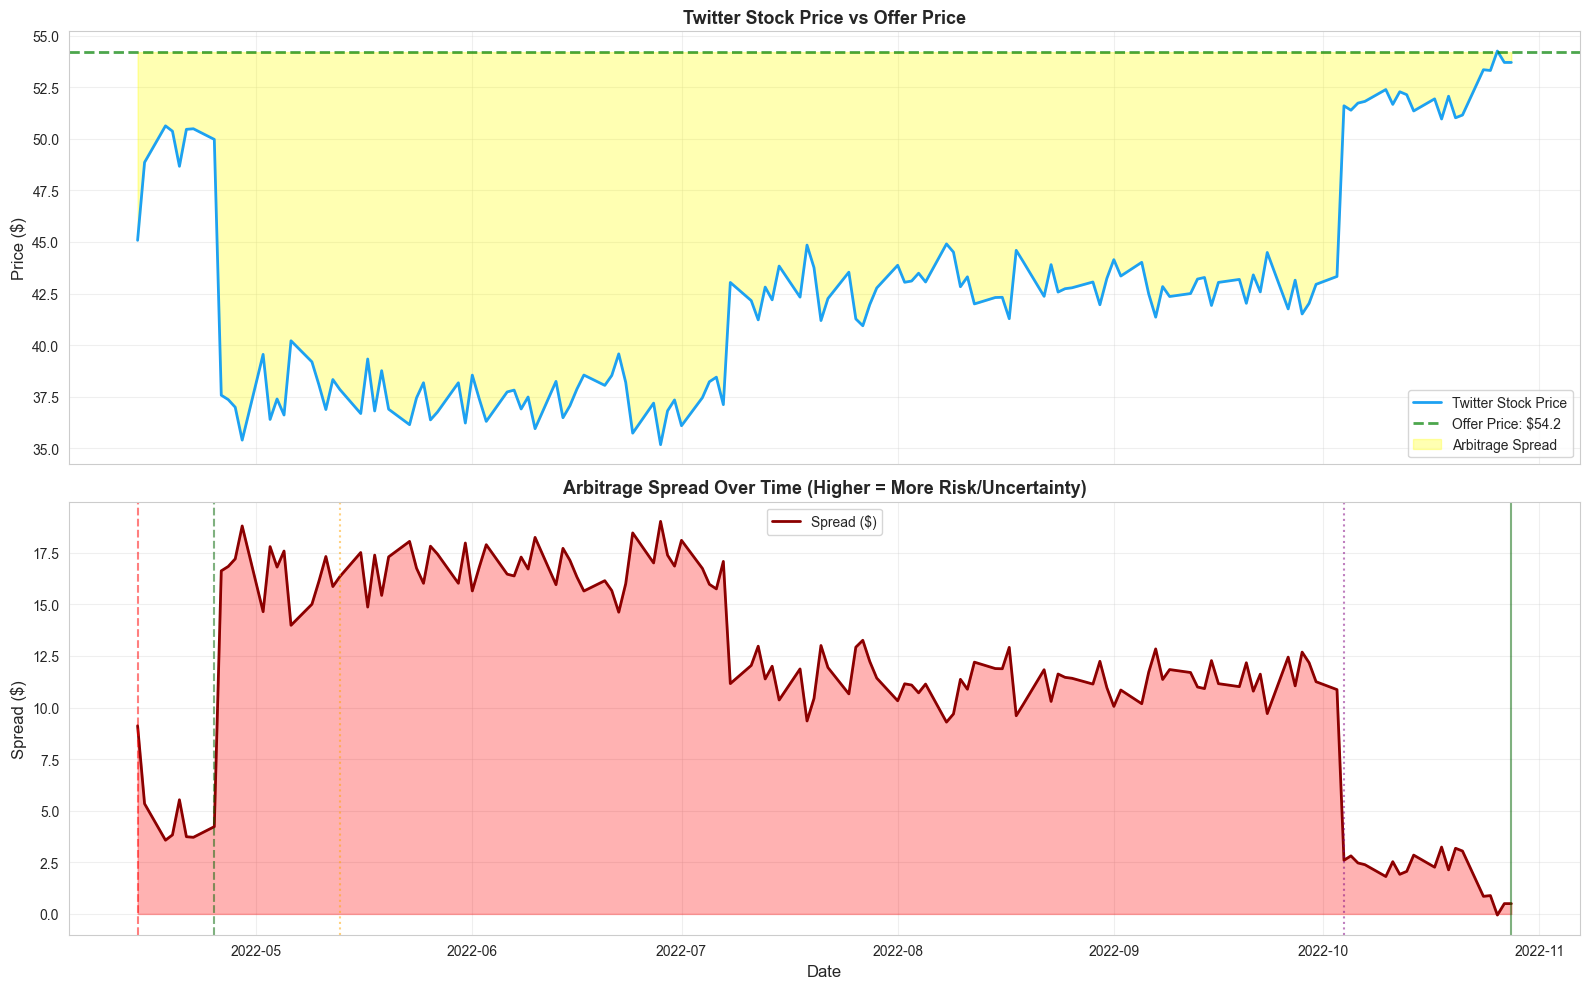

In [6]:
# Solution 2.2: Plot arbitrage spread
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10), sharex=True)

# Top plot: Stock price vs Offer price
ax1.plot(twtr_arb.index, twtr_arb['Close'], linewidth=2, label='Twitter Stock Price', color='#1DA1F2')
ax1.axhline(y=offer_price, color='green', linestyle='--', linewidth=2, label=f'Offer Price: ${offer_price}', alpha=0.7)
ax1.fill_between(twtr_arb.index, twtr_arb['Close'], offer_price, alpha=0.3, color='yellow', label='Arbitrage Spread')

ax1.set_ylabel('Price ($)', fontsize=12)
ax1.set_title('Twitter Stock Price vs Offer Price', fontsize=13, fontweight='bold')
ax1.legend(loc='best')
ax1.grid(True, alpha=0.3)

# Bottom plot: Spread in dollars
ax2.plot(twtr_arb.index, twtr_arb['Spread'], linewidth=2, color='darkred', label='Spread ($)')
ax2.fill_between(twtr_arb.index, 0, twtr_arb['Spread'], alpha=0.3, color='red')

# Mark key events
for date_str, (label, color, style) in key_dates.items():
    if date_str >= announcement_date:
        date = pd.Timestamp(date_str)
        ax2.axvline(x=date, color=color, linestyle=style, linewidth=1.5, alpha=0.5)

ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Spread ($)', fontsize=12)
ax2.set_title('Arbitrage Spread Over Time (Higher = More Risk/Uncertainty)', fontsize=13, fontweight='bold')
ax2.legend(loc='best')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Task 2.3**: Calculate the annualized return potential for each day, assuming the deal closes on October 28, 2022.

Formula: $\text{Annualized Return} = \left(\frac{\text{Offer Price}}{\text{Current Price}} - 1\right) \times \frac{365}{\text{Days to Close}}$

In [7]:
# Solution 2.3: Calculate annualized returns
deal_close_date = pd.Timestamp('2022-10-28')

# Calculate days to close for each date
twtr_arb['Days_to_Close'] = (deal_close_date - twtr_arb.index).days

# Calculate potential return if held to close
twtr_arb['Return_if_Held'] = (twtr_arb['Offer_Price'] / twtr_arb['Close'] - 1) * 100

# Calculate annualized return
twtr_arb['Annualized_Return'] = twtr_arb['Return_if_Held'] * (365 / twtr_arb['Days_to_Close'])

print("Annualized Return Analysis:")
print("="*70)
print(f"Average annualized return: {twtr_arb['Annualized_Return'].mean():.2f}%")
print(f"Maximum annualized return: {twtr_arb['Annualized_Return'].max():.2f}%")
print(f"Minimum annualized return: {twtr_arb['Annualized_Return'].min():.2f}%")

# Show key dates
print("\nAnnualized Return on Key Dates:")
for date_str, (label, _, _) in key_dates.items():
    if date_str >= announcement_date and date_str in twtr_arb.index:
        row = twtr_arb.loc[date_str]
        print(f"{label} ({date_str}):")
        print(f"  Price: ${row['Close']:.2f}, Spread: ${row['Spread']:.2f}, Days to close: {row['Days_to_Close']}, Annualized return: {row['Annualized_Return']:.2f}%")

Annualized Return Analysis:
Average annualized return: inf%
Maximum annualized return: inf%
Minimum annualized return: -18.03%

Annualized Return on Key Dates:
Offer Announced (2022-04-14):
  Price: $45.08, Spread: $9.12, Days to close: 197.0, Annualized return: 37.48%
Deal Accepted (2022-04-25):
  Price: $49.97, Spread: $4.23, Days to close: 186.0, Annualized return: 16.61%
Deal "On Hold" (2022-05-13):
  Price: $37.85, Spread: $16.35, Days to close: 168.0, Annualized return: 93.82%
Deal Revived (2022-10-04):
  Price: $51.60, Spread: $2.60, Days to close: 24.0, Annualized return: 76.66%
Deal Closed (2022-10-28):
  Price: $53.70, Spread: $0.50, Days to close: 0.0, Annualized return: inf%


**Task 2.4**: Create a scatter plot showing the relationship between days to close and annualized return.

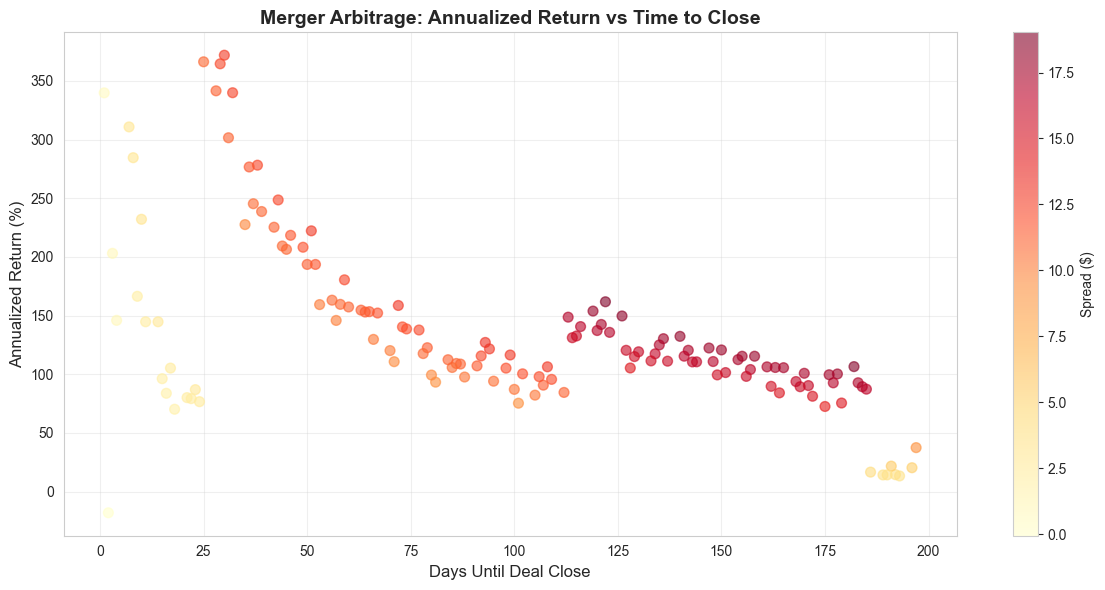

Interpretation:
- Higher annualized returns appear when there are more days until close (more time risk)
- Color intensity shows the spread - darker colors = larger spread = more risk


In [8]:
# Solution 2.4: Scatter plot of days to close vs annualized return
fig, ax = plt.subplots(figsize=(12, 6))

scatter = ax.scatter(twtr_arb['Days_to_Close'], twtr_arb['Annualized_Return'], 
                     c=twtr_arb['Spread'], cmap='YlOrRd', s=50, alpha=0.6)

ax.set_xlabel('Days Until Deal Close', fontsize=12)
ax.set_ylabel('Annualized Return (%)', fontsize=12)
ax.set_title('Merger Arbitrage: Annualized Return vs Time to Close', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Spread ($)', fontsize=10)

plt.tight_layout()
plt.show()

print("Interpretation:")
print("- Higher annualized returns appear when there are more days until close (more time risk)")
print("- Color intensity shows the spread - darker colors = larger spread = more risk")

---
## Part 3: Implement the Merger Arbitrage Strategy

**Task 3.1**: Implement a simple merger arbitrage strategy:
- **Enter**: Buy Twitter stock the day after the deal is announced (April 15, 2022)
- **Exit**: Sell on the day the deal closes (October 28, 2022) at the offer price

Calculate the total return and holding period.

In [9]:
# Solution 3.1: Simple buy-and-hold merger arbitrage
entry_date = '2022-04-15'  # Day after announcement
exit_date = '2022-10-28'   # Deal close date

# Get entry and exit prices
entry_price = twtr.loc[entry_date, 'Close']
exit_price = offer_price  # Receive offer price when deal closes

# Calculate return
total_return = ((exit_price / entry_price) - 1) * 100
holding_days = (pd.Timestamp(exit_date) - pd.Timestamp(entry_date)).days
annualized_return = total_return * (365 / holding_days)

print("Simple Merger Arbitrage Strategy:")
print("="*60)
print(f"Entry Date: {entry_date}")
print(f"Entry Price: ${entry_price:.2f}")
print(f"Exit Date: {exit_date}")
print(f"Exit Price: ${exit_price:.2f}")
print(f"\nHolding Period: {holding_days} days ({holding_days / 30:.1f} months)")
print(f"Total Return: {total_return:.2f}%")
print(f"Annualized Return: {annualized_return:.2f}%")
print(f"\nInitial Spread: ${offer_price - entry_price:.2f}")
print(f"Profit per share: ${exit_price - entry_price:.2f}")

Simple Merger Arbitrage Strategy:
Entry Date: 2022-04-15
Entry Price: $48.86
Exit Date: 2022-10-28
Exit Price: $54.20

Holding Period: 196 days (6.5 months)
Total Return: 10.93%
Annualized Return: 20.36%

Initial Spread: $5.34
Profit per share: $5.34


**Task 3.2**: Calculate what would have happened if you invested $100,000 in this strategy.

Also calculate the return of a buy-and-hold strategy starting January 3, 2022.

In [10]:
# Solution 3.2: Calculate profit on $100,000 investment
investment = 100000

# Merger arbitrage strategy
shares_bought = investment / entry_price
final_value = shares_bought * exit_price
profit = final_value - investment

print("Investment Analysis: $100,000")
print("="*60)
print("\nMerger Arbitrage Strategy (entered Apr 15):")
print(f"  Shares purchased: {shares_bought:.2f}")
print(f"  Final value: ${final_value:,.2f}")
print(f"  Profit: ${profit:,.2f}")
print(f"  Return: {total_return:.2f}%")

# Compare with buy-and-hold from start of year
jan_price = twtr.iloc[0]['Close']
shares_jan = investment / jan_price
final_value_jan = shares_jan * exit_price
profit_jan = final_value_jan - investment
return_jan = ((exit_price / jan_price) - 1) * 100

print("\nBuy-and-Hold Strategy (from Jan 3):")
print(f"  Entry price: ${jan_price:.2f}")
print(f"  Shares purchased: {shares_jan:.2f}")
print(f"  Final value: ${final_value_jan:,.2f}")
print(f"  Profit: ${profit_jan:,.2f}")
print(f"  Return: {return_jan:.2f}%")

print("\nComparison:")
print(f"  Extra profit from merger arbitrage: ${profit - profit_jan:,.2f}")
print(f"  Holding period was {holding_days} days shorter")

Investment Analysis: $100,000

Merger Arbitrage Strategy (entered Apr 15):
  Shares purchased: 2046.74
  Final value: $110,933.27
  Profit: $10,933.27
  Return: 10.93%

Buy-and-Hold Strategy (from Jan 3):
  Entry price: $41.75
  Shares purchased: 2395.47
  Final value: $129,834.49
  Profit: $29,834.49
  Return: 29.83%

Comparison:
  Extra profit from merger arbitrage: $-18,901.22
  Holding period was 196 days shorter


**Task 3.3**: Analyze the drawdown during the holding period. What was the maximum loss if you had panic-sold at the worst time?

Drawdown Analysis (Unrealized Losses During Holding):
Entry value: $100,000.00

Maximum Drawdown:
  Date: 2022-06-28
  Stock price: $35.18
  Portfolio value: $71,996.08
  Unrealized loss: $-28,003.92 (-28.00%)

This occurred during the period when Musk tried to back out of the deal.
Investors who held through this uncertainty were rewarded when deal closed.


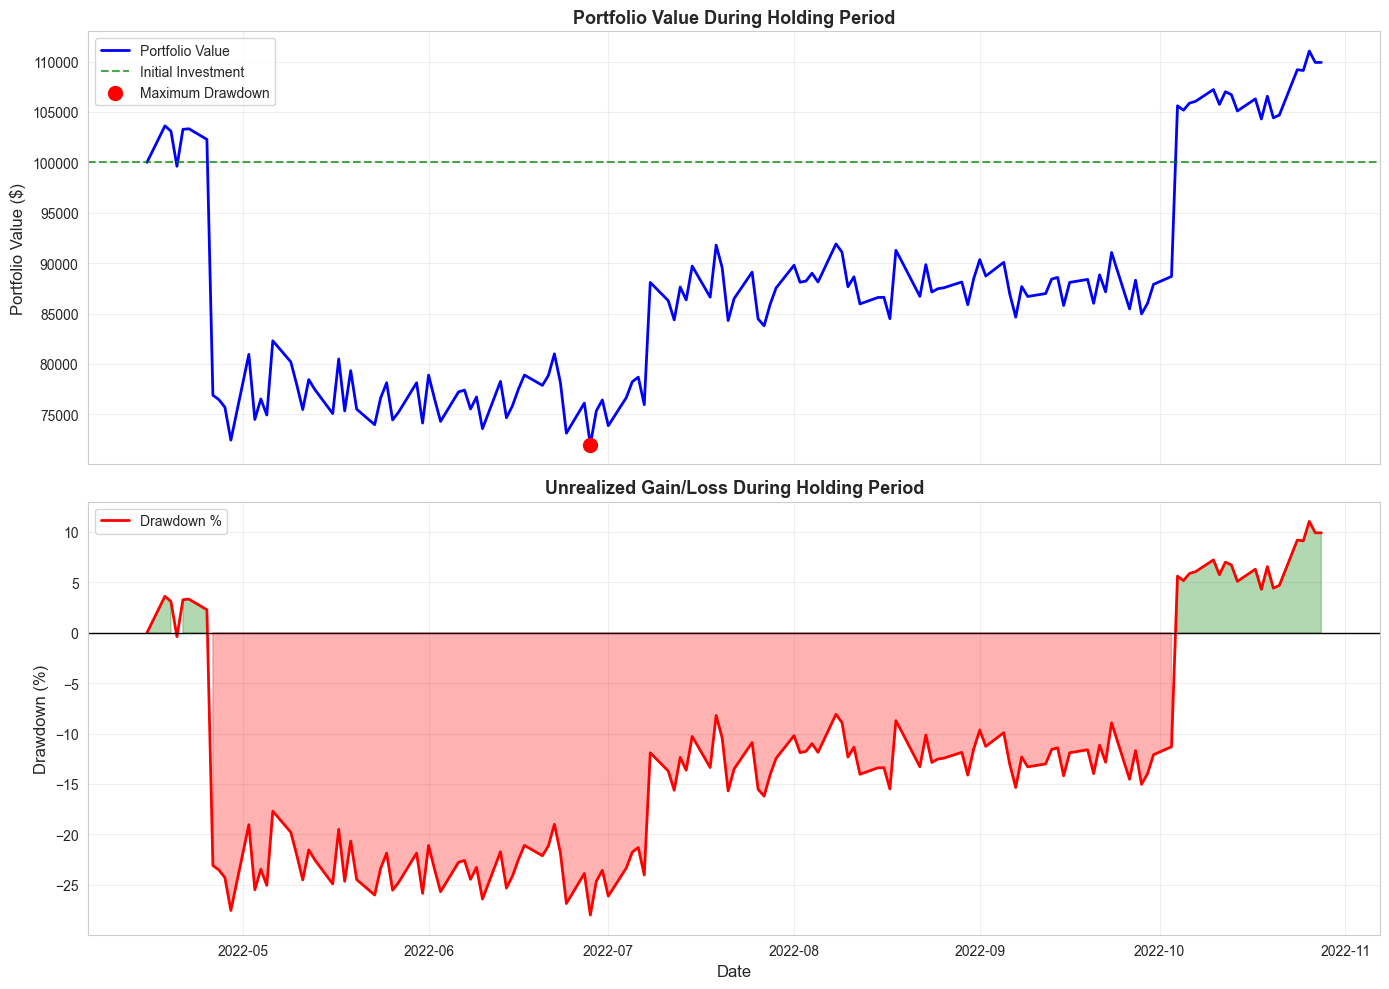

In [11]:
# Solution 3.3: Calculate drawdown (unrealized loss) during holding period
holding_period = twtr.loc[entry_date:exit_date].copy()
holding_period['Value'] = (investment / entry_price) * holding_period['Close']
holding_period['Drawdown'] = holding_period['Value'] - investment
holding_period['Drawdown_Pct'] = (holding_period['Value'] / investment - 1) * 100

# Find maximum drawdown
max_dd_idx = holding_period['Drawdown'].idxmin()
max_dd = holding_period.loc[max_dd_idx, 'Drawdown']
max_dd_pct = holding_period.loc[max_dd_idx, 'Drawdown_Pct']
worst_price = holding_period.loc[max_dd_idx, 'Close']

print("Drawdown Analysis (Unrealized Losses During Holding):")
print("="*60)
print(f"Entry value: ${investment:,.2f}")
print(f"\nMaximum Drawdown:")
print(f"  Date: {max_dd_idx.strftime('%Y-%m-%d')}")
print(f"  Stock price: ${worst_price:.2f}")
print(f"  Portfolio value: ${holding_period.loc[max_dd_idx, 'Value']:,.2f}")
print(f"  Unrealized loss: ${max_dd:,.2f} ({max_dd_pct:.2f}%)")
print(f"\nThis occurred during the period when Musk tried to back out of the deal.")
print(f"Investors who held through this uncertainty were rewarded when deal closed.")

# Plot drawdown
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Portfolio value
ax1.plot(holding_period.index, holding_period['Value'], linewidth=2, label='Portfolio Value', color='blue')
ax1.axhline(y=investment, color='green', linestyle='--', linewidth=1.5, label='Initial Investment', alpha=0.7)
ax1.scatter([max_dd_idx], [holding_period.loc[max_dd_idx, 'Value']], color='red', s=100, zorder=5, label='Maximum Drawdown')
ax1.set_ylabel('Portfolio Value ($)', fontsize=12)
ax1.set_title('Portfolio Value During Holding Period', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Drawdown percentage
ax2.plot(holding_period.index, holding_period['Drawdown_Pct'], linewidth=2, color='red', label='Drawdown %')
ax2.fill_between(holding_period.index, 0, holding_period['Drawdown_Pct'], 
                 where=(holding_period['Drawdown_Pct'] < 0), alpha=0.3, color='red')
ax2.fill_between(holding_period.index, 0, holding_period['Drawdown_Pct'], 
                 where=(holding_period['Drawdown_Pct'] >= 0), alpha=0.3, color='green')
ax2.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Drawdown (%)', fontsize=12)
ax2.set_title('Unrealized Gain/Loss During Holding Period', fontsize=13, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---
## Part 4: Risk Analysis

**Task 4.1**: Calculate daily returns and volatility during the holding period.

In [12]:
# Solution 4.1: Calculate volatility
holding_period['Daily_Return'] = holding_period['Close'].pct_change() * 100

# Calculate statistics
mean_daily_return = holding_period['Daily_Return'].mean()
daily_volatility = holding_period['Daily_Return'].std()
annualized_volatility = daily_volatility * np.sqrt(252)

print("Risk Analysis During Holding Period:")
print("="*60)
print(f"Mean daily return: {mean_daily_return:.3f}%")
print(f"Daily volatility (std dev): {daily_volatility:.3f}%")
print(f"Annualized volatility: {annualized_volatility:.2f}%")
print(f"\nBest daily gain: {holding_period['Daily_Return'].max():.2f}%")
print(f"Worst daily loss: {holding_period['Daily_Return'].min():.2f}%")

# Calculate Sharpe ratio (assuming 2% risk-free rate in 2022)
risk_free_rate = 2.0  # Annual risk-free rate
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility

print(f"\nSharpe Ratio: {sharpe_ratio:.2f}")
print(f"(Annualized Return: {annualized_return:.2f}%, Risk-free rate: {risk_free_rate}%, Volatility: {annualized_volatility:.2f}%)")

Risk Analysis During Holding Period:
Mean daily return: 0.170%
Daily volatility (std dev): 4.496%
Annualized volatility: 71.38%

Best daily gain: 19.09%
Worst daily loss: -24.81%

Sharpe Ratio: 0.26
(Annualized Return: 20.36%, Risk-free rate: 2.0%, Volatility: 71.38%)


**Task 4.2**: Create a histogram of daily returns to visualize the distribution.

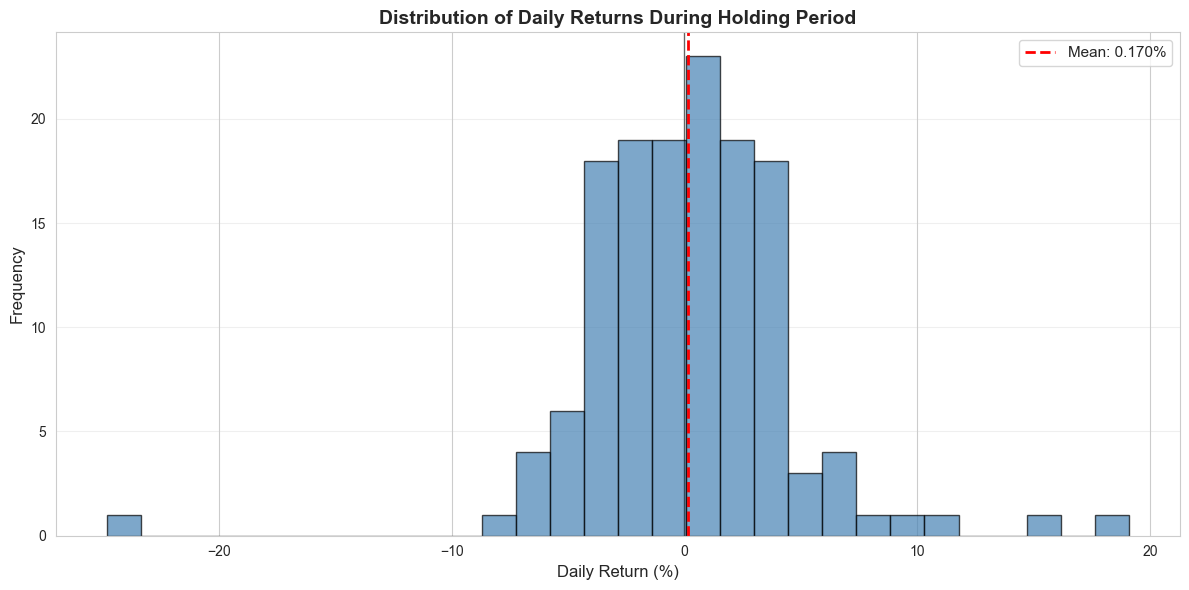

Distribution Statistics:
Skewness: -0.257
Kurtosis: 8.704


In [13]:
# Solution 4.2: Histogram of daily returns
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(holding_period['Daily_Return'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='steelblue')
ax.axvline(x=mean_daily_return, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_daily_return:.3f}%')
ax.axvline(x=0, color='black', linestyle='-', linewidth=1, alpha=0.5)

ax.set_xlabel('Daily Return (%)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Distribution of Daily Returns During Holding Period', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("Distribution Statistics:")
print(f"Skewness: {holding_period['Daily_Return'].skew():.3f}")
print(f"Kurtosis: {holding_period['Daily_Return'].kurtosis():.3f}")

**Task 4.3**: Identify the 5 days with the largest price movements and research what news might have caused them.

In [14]:
# Solution 4.3: Identify largest price movements
holding_period['Abs_Return'] = holding_period['Daily_Return'].abs()
top_moves = holding_period.nlargest(5, 'Abs_Return')[['Close', 'Daily_Return']]

print("5 Largest Daily Price Movements:")
print("="*70)
print(top_moves)

print("\nPossible Explanations (based on news timeline):")
print("- Large negative moves likely coincide with news of Musk trying to exit deal")
print("- Large positive moves likely coincide with news of deal progressing")
print("- During periods of high volatility, deal uncertainty was highest")

5 Largest Daily Price Movements:
            Close  Daily_Return
Date                           
2022-04-26  37.57        -24.81
2022-10-04  51.60         19.09
2022-07-08  43.04         15.95
2022-05-02  39.55         11.74
2022-05-06  40.21          9.83

Possible Explanations (based on news timeline):
- Large negative moves likely coincide with news of Musk trying to exit deal
- Large positive moves likely coincide with news of deal progressing
- During periods of high volatility, deal uncertainty was highest


---
## Summary and Key Takeaways

### What We Learned:

1. **Merger Arbitrage Mechanics**: 
   - Target stock trades below offer price due to deal risk
   - The spread represents compensation for uncertainty
   - Profit realized when deal closes

2. **Risk Factors**:
   - Deal may not close (regulatory, financing, buyer backs out)
   - Time risk (longer timeframe = more uncertainty)
   - Market risk (stock can decline below entry price)

3. **Return Characteristics**:
   - Returns are typically modest but consistent (if deal closes)
   - Annualized returns depend on holding period
   - Risk-adjusted returns can be attractive

4. **Real-World Application**:
   - The Twitter deal had unusual uncertainty (Musk's on-off commitment)
   - This created wider spreads = higher potential returns
   - Investors who held through uncertainty were rewarded

### Strategy Suitability:

Merger arbitrage is suitable for:
- Risk-aware investors who can withstand volatility
- Those who can analyze deal probability
- Investors seeking diversification (uncorrelated with market)

**Not suitable for:**
- Risk-averse investors
- Those who cannot tolerate drawdowns
- Short-term traders (requires holding to deal close)

In [15]:
# Final summary statistics
print("="*70)
print("FINAL SUMMARY: Twitter Merger Arbitrage (2022)")
print("="*70)
print(f"\nStrategy: Buy Twitter stock after announcement, hold until deal close")
print(f"Entry: {entry_date} at ${entry_price:.2f}")
print(f"Exit: {exit_date} at ${exit_price:.2f}")
print(f"\nResults:")
print(f"  Holding period: {holding_days} days")
print(f"  Total return: {total_return:.2f}%")
print(f"  Annualized return: {annualized_return:.2f}%")
print(f"  Maximum drawdown: {max_dd_pct:.2f}%")
print(f"  Volatility: {annualized_volatility:.2f}%")
print(f"  Sharpe ratio: {sharpe_ratio:.2f}")
print(f"\n  $100,000 investment → ${final_value:,.2f} (profit: ${profit:,.2f})")
print("="*70)

FINAL SUMMARY: Twitter Merger Arbitrage (2022)

Strategy: Buy Twitter stock after announcement, hold until deal close
Entry: 2022-04-15 at $48.86
Exit: 2022-10-28 at $54.20

Results:
  Holding period: 196 days
  Total return: 10.93%
  Annualized return: 20.36%
  Maximum drawdown: -28.00%
  Volatility: 71.38%
  Sharpe ratio: 0.26

  $100,000 investment → $110,933.27 (profit: $10,933.27)
